## Random Forest

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Load the dataset
df = pd.read_excel(r"E:\Excelr assignments\Random Forest\Random Forest\glass.xlsx")

In [30]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
# Exploratory Data Analysis (EDA)
# Shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (214, 10)


In [32]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [33]:
# Display the last few rows
print("Last few rows of the dataset:")
print(df.tail())

Last few rows of the dataset:
          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7


In [34]:
# Data types and null values
print("\nData types and null values:")
print(df.info())


Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [35]:
# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      

In [36]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1


In [37]:
# Display the duplicate rows
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])

Duplicate rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1


In [38]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"\nNumber of duplicate rows after dropping: {df.duplicated().sum()}")



Number of duplicate rows after dropping: 0


In [39]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


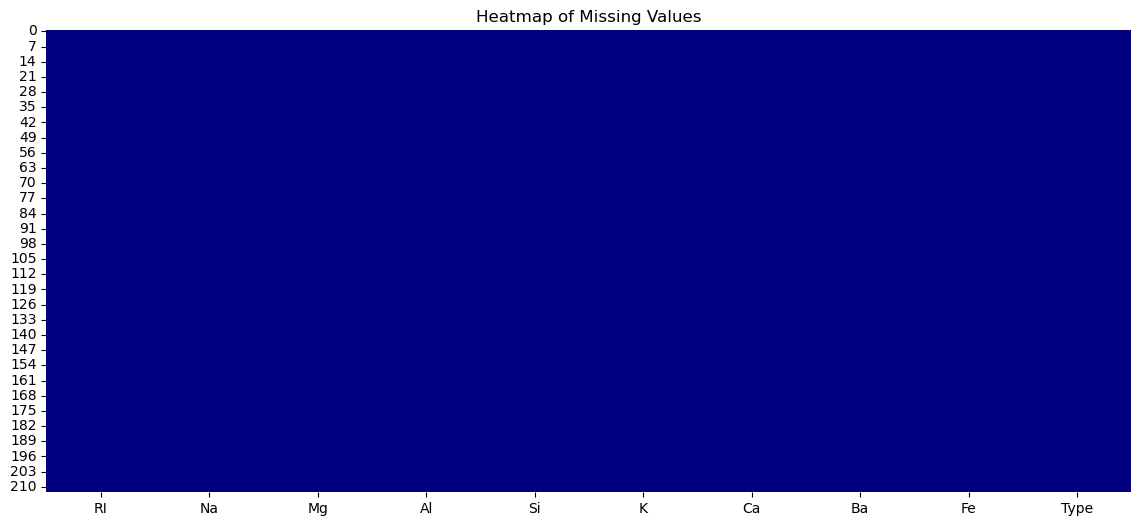

In [40]:
# Visualize missing values with a heatmap
colours = sns.color_palette(["navy", "yellow"])
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap=colours, cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()


In [41]:
# Unique values in each column
print("\nNumber of unique values in each column:")
for col in df:
    print(f"{col}: {df[col].nunique()}")


Number of unique values in each column:
RI: 178
Na: 142
Mg: 94
Al: 118
Si: 133
K: 65
Ca: 143
Ba: 34
Fe: 32
Type: 6


In [42]:
# Display unique values in each column
print("\nUnique values in each column:")
for col in df:
    print(f"{col}: {df[col].unique()}")



Unique values in each column:
RI: [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169 

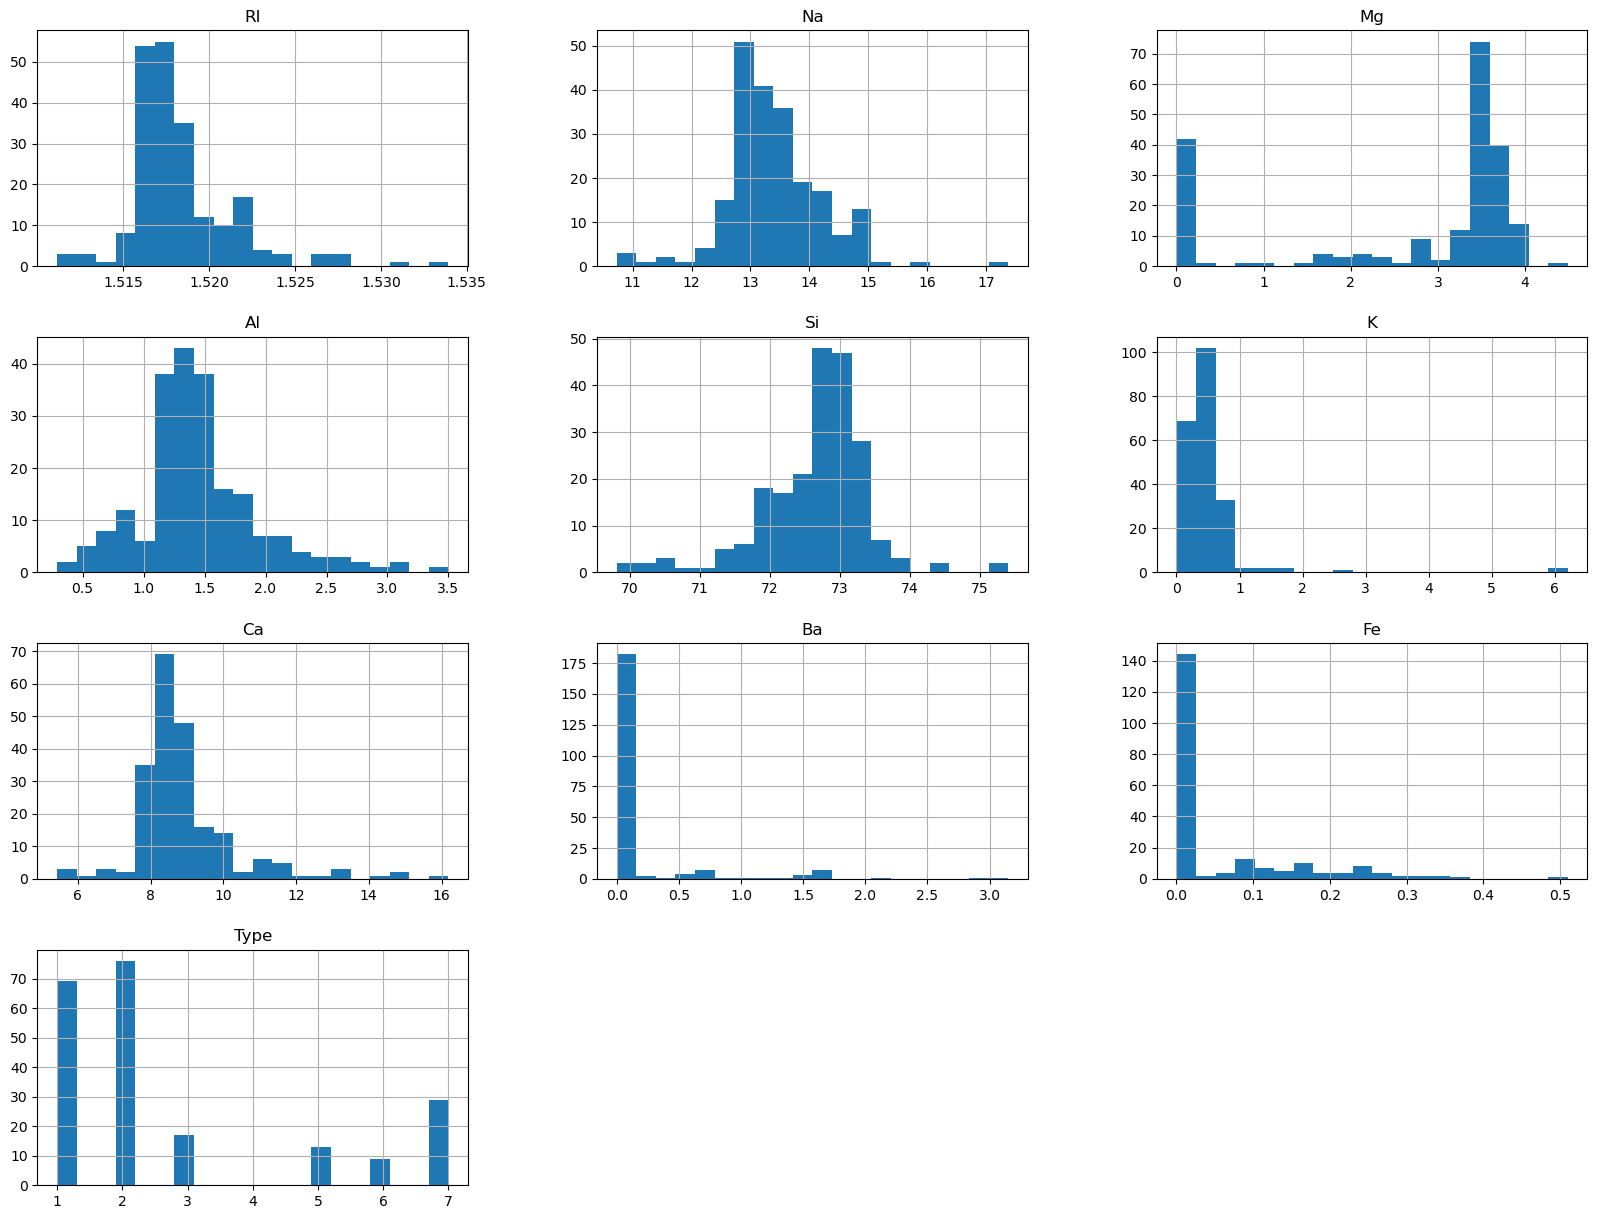

In [43]:
# Visualizations
# Distribution of each feature
df.hist(bins=20, figsize=(20, 15))
plt.show()

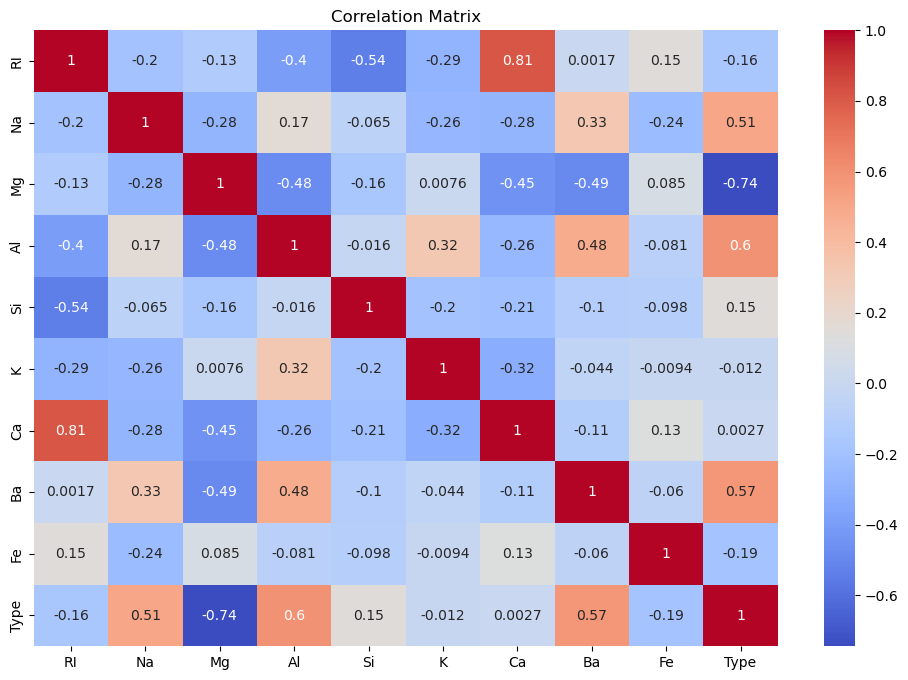

In [44]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

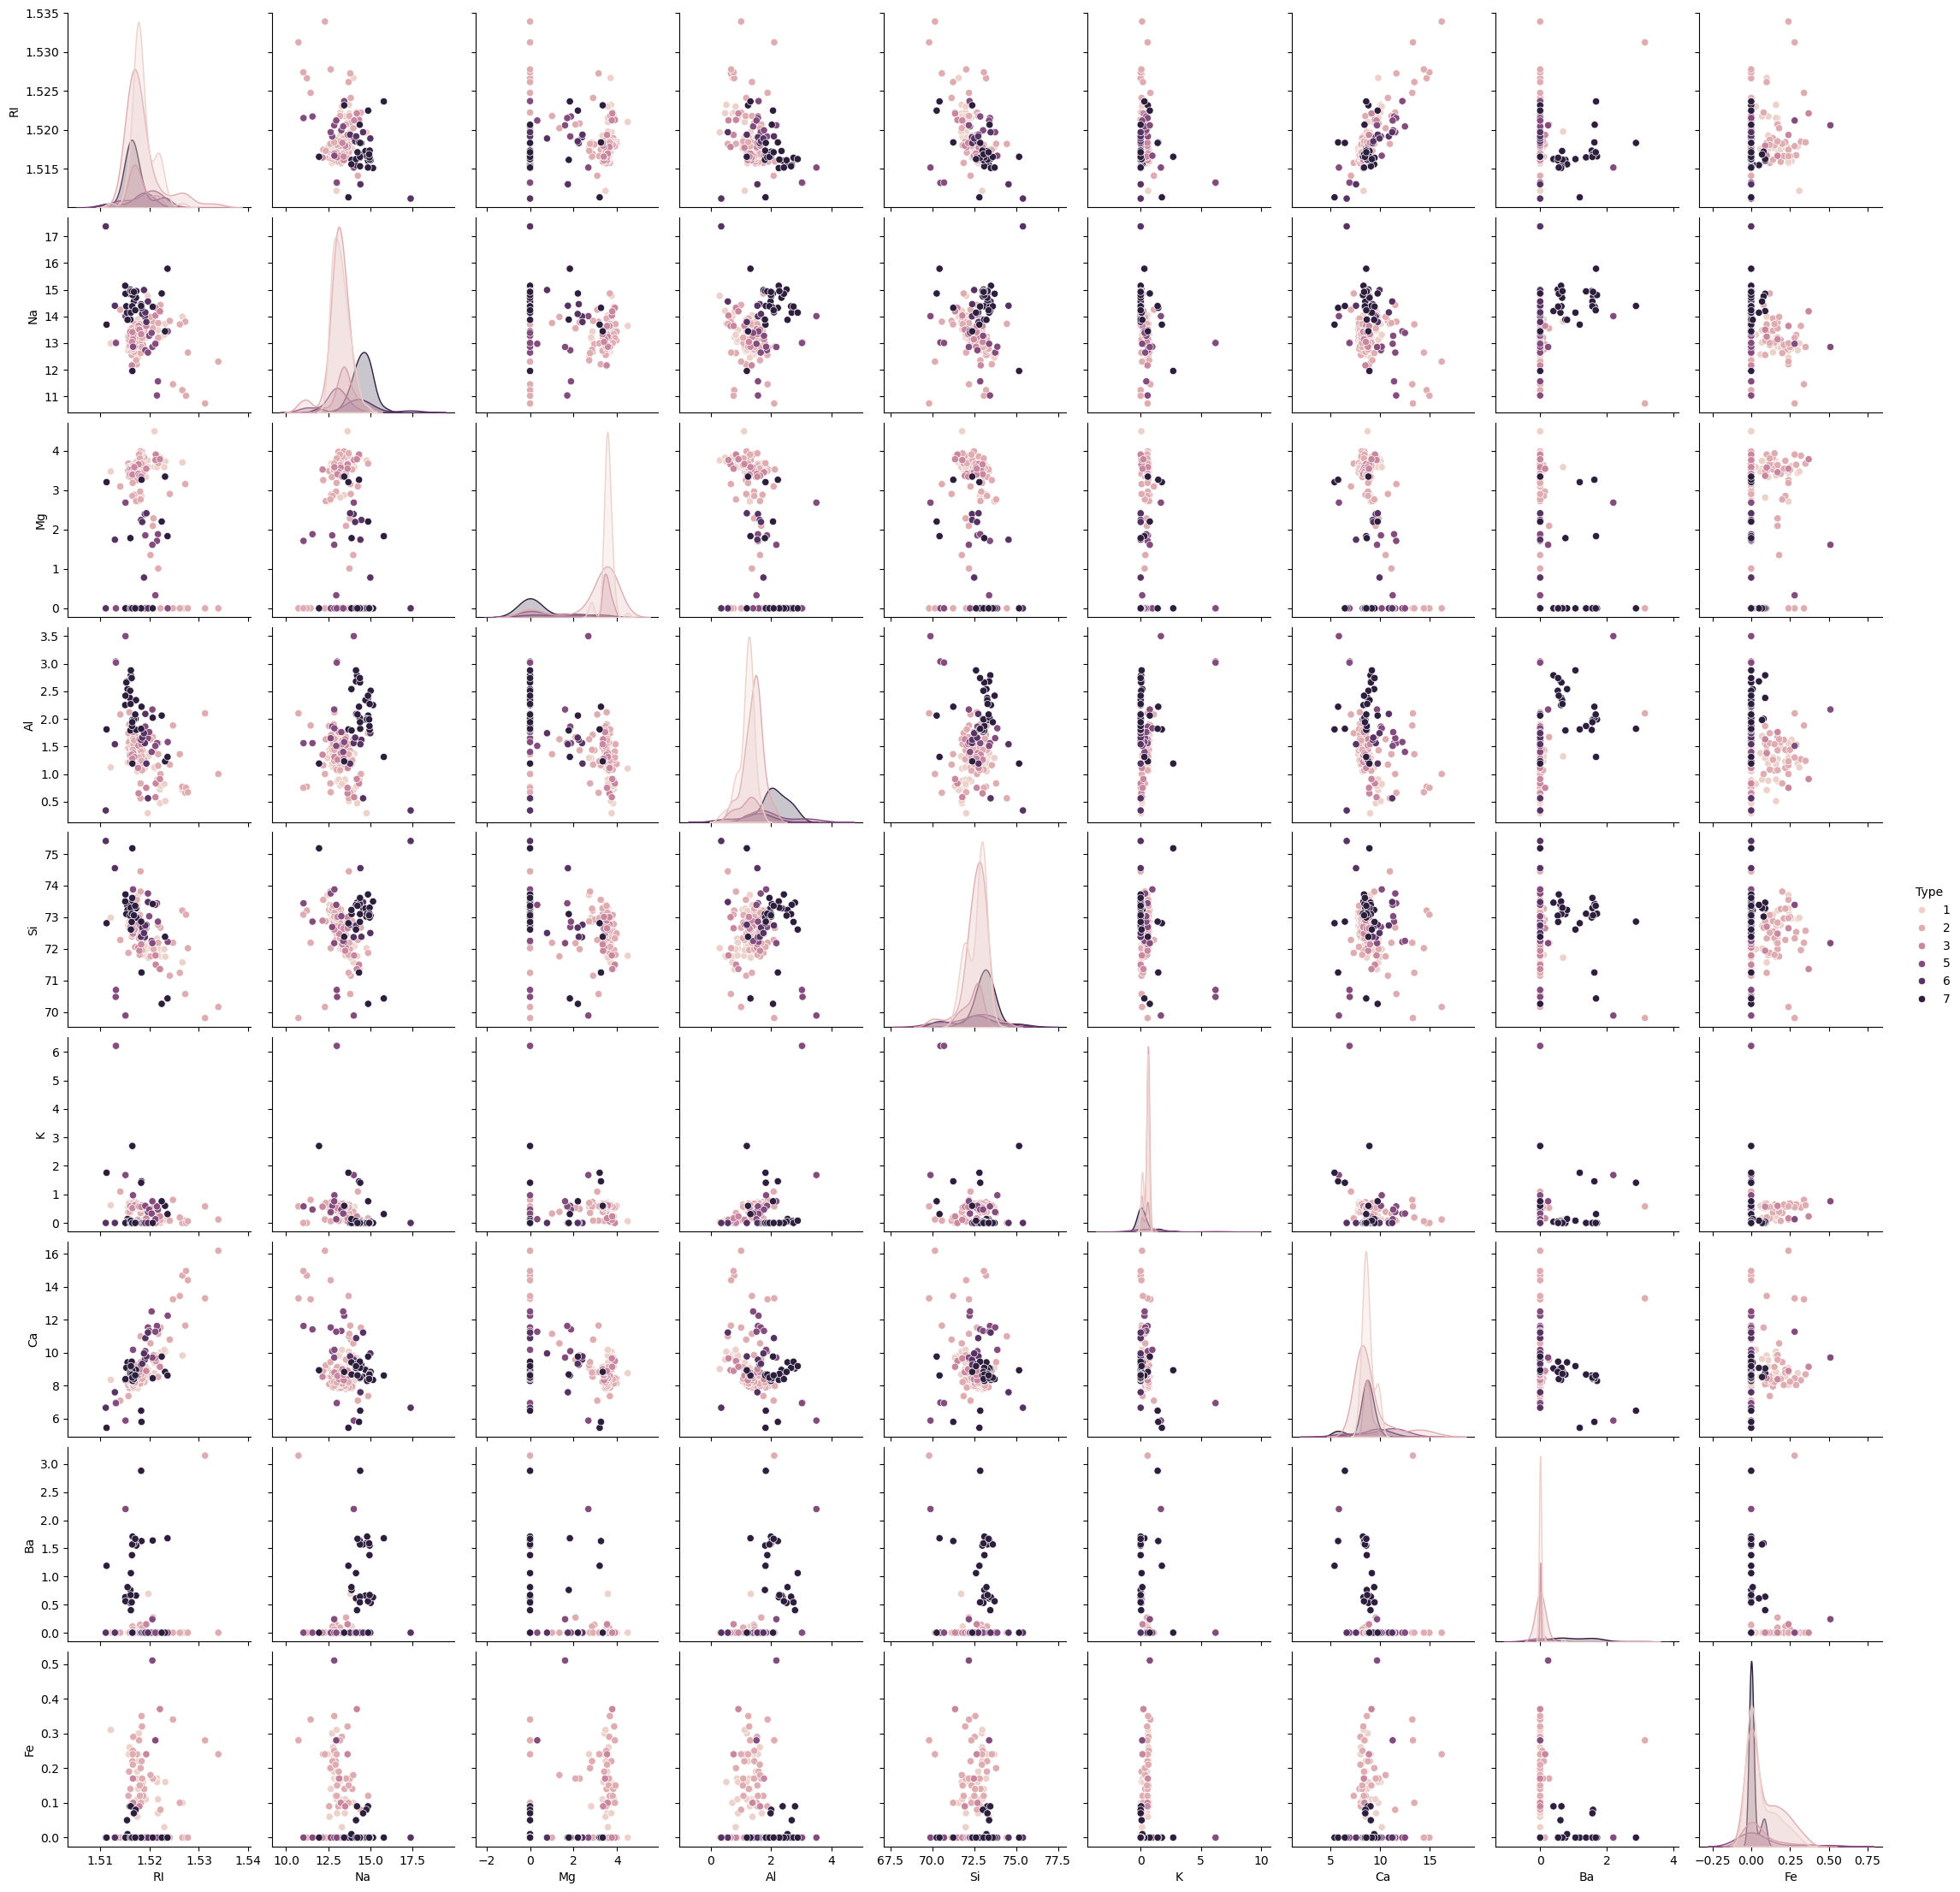

In [45]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df, hue='Type')
plt.show()

In [46]:
# Split the data into features and target
X = df.drop('Type', axis=1)
y = df['Type']


In [47]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [50]:
# Define classifiers
rf = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)


In [51]:
# Train and evaluate classifiers
for clf, name in zip([rf, bagging, adaboost], ['Random Forest', 'Bagging', 'AdaBoost']):
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classifier Report:\n")
    print(classification_report(y_test, y_pred))


Random Forest Classifier Report:

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.83      0.67      0.74        15
           3       0.60      1.00      0.75         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.78      0.89      0.82        43
weighted avg       0.83      0.81      0.81        43


Bagging Classifier Report:

              precision    recall  f1-score   support

           1       0.90      0.64      0.75        14
           2       0.73      0.73      0.73        15
           3       0.43      1.00      0.60         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy 

In [53]:
# Cross-validation scores
print("\nCross-validation scores:")
for clf, name in zip([rf, bagging, adaboost], ['Random Forest', 'Bagging', 'AdaBoost']):
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    print(f"{name}: {scores.mean():.3f} ± {scores.std():.3f}")



Cross-validation scores:
Random Forest: 0.700 ± 0.064
Bagging: 0.671 ± 0.044
AdaBoost: 0.338 ± 0.090


### Conclusion : 
### Conclusion (Short Version)

- The glass dataset was analyzed, revealing no missing values but some duplicate rows, which were removed.
- Correlation analysis showed moderate correlations between features, indicating potential multicollinearity.
- Class imbalance was addressed using SMOTE.
- Three ensemble models (Random Forest, Bagging, AdaBoost) were trained and evaluated.
- The models showed consistent performance, making them effective for glass type classification.
